In [2]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0          ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0.9000     ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Reproduce the following figure using the dataset found [here](https://github.com/fivethirtyeight/data/blob/master/college-majors/recent-grads.csv).

<img src="figs/example.png" style="width: 750px" />

In [4]:
grads = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  Major = col_character(),
  Major_category = col_character()
)

See spec(...) for full column specifications.



In [5]:
grads %>% head(5)

Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,⋯,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0.1205643,36,1976,⋯,270,1207,37,0.01838053,110000,95000,125000,1534,364,193
2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.1018519,7,640,⋯,170,388,85,0.11724138,75000,55000,90000,350,257,50
3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0.1530374,3,648,⋯,133,340,16,0.02409639,73000,50000,105000,456,176,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0.1073132,16,758,⋯,150,692,40,0.05012531,70000,43000,80000,529,102,0
5,2405,CHEMICAL ENGINEERING,32260,21239,11021,Engineering,0.3416305,289,25694,⋯,5180,16697,1672,0.06109771,65000,50000,75000,18314,4440,972


In [40]:
grads.ordered = grads %>%
    arrange(desc(Men)) %>%
    mutate(Major_category = fct_inorder(Major_category)) %>%
    .$Major_category %>% levels

grads.ordered %>% head(5)

In [43]:
grads.long = select(grads, Men, Women, Major_category) %>%
    pivot_longer(cols = c('Men','Women'), names_to = 'Sex', values_to = 'Count') %>%
    group_by(Major_category, Sex) %>%
    summarize(N=sum(Count, na.rm=1))

grads.long %>% head(5)

Major_category,Sex,N
<chr>,<chr>,<dbl>
Agriculture & Natural Resources,Men,40357
Agriculture & Natural Resources,Women,35263
Arts,Men,134390
Arts,Women,222740
Biology & Life Science,Men,184919


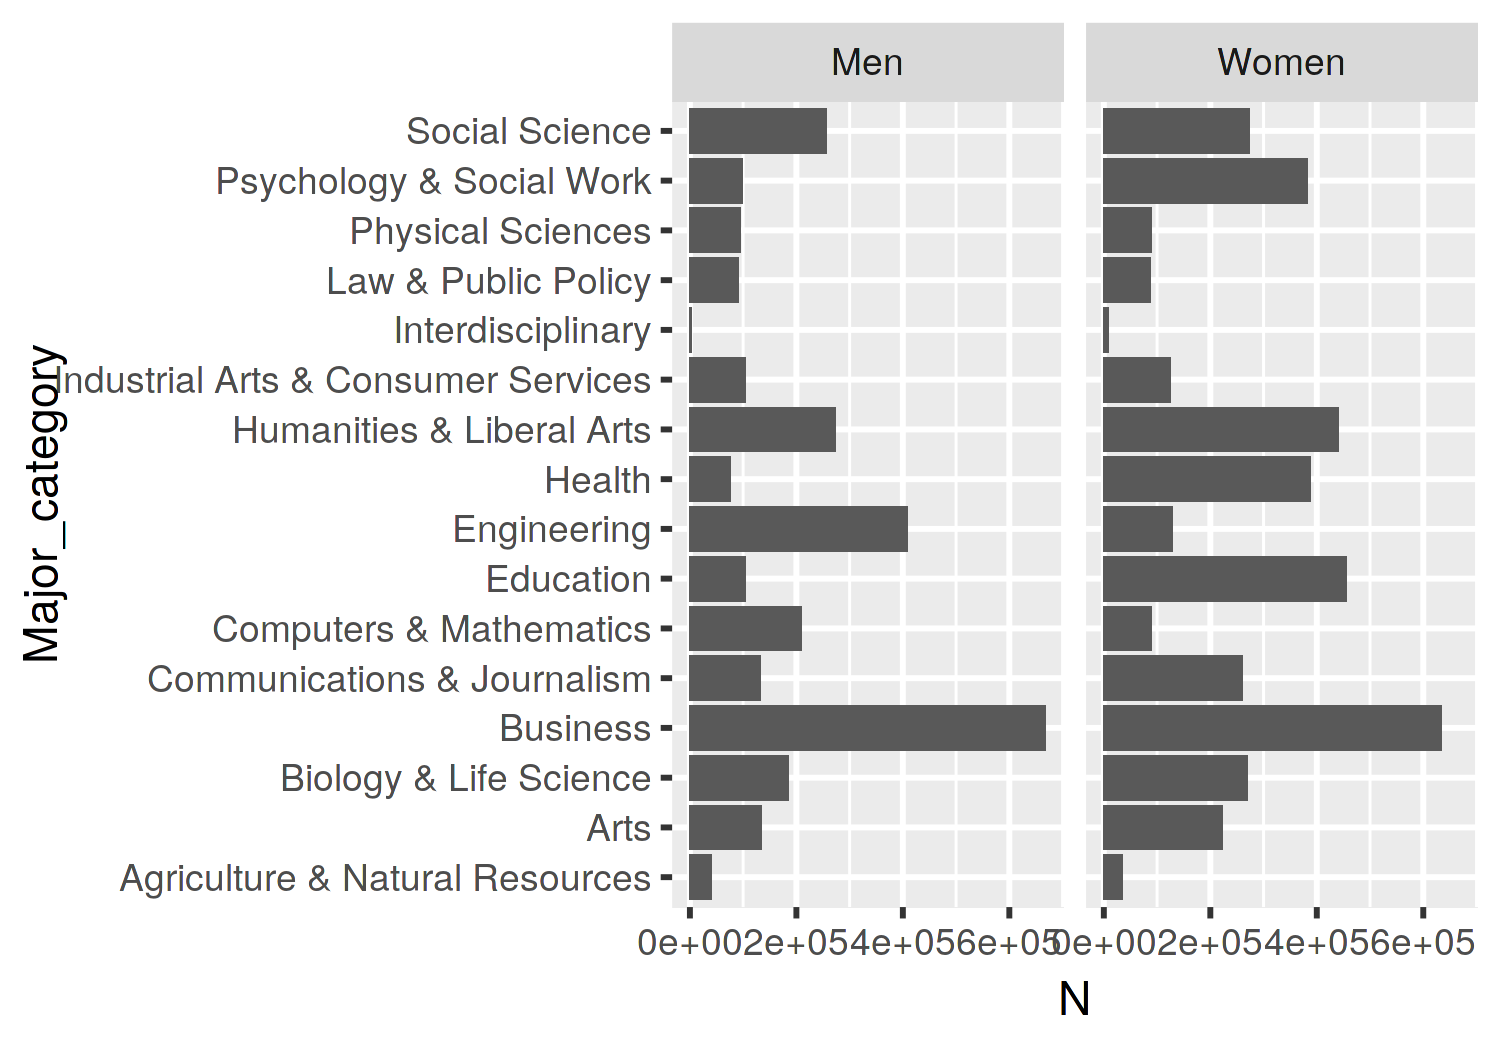

In [35]:
options(repr.plot.width=5, repr.plot.height=3.5, repr.plot.res=300)
p = ggplot(grads.long, aes(x=Major_category, y=N))
p = p + geom_bar(stat = 'identity')
p = p + coord_flip()
p = p + facet_wrap(~Sex)
p

How would you add hover interactivity to this figure?